In [1]:
%matplotlib inline


# Customizing Figure Layouts Using GridSpec and Other Functions


How to create grid-shaped combinations of axes.

    :func:`~matplotlib.pyplot.subplots`
        Perhaps the primary function used to create figures and axes.
        It's also similar to :func:`~matplotlib.pyplot.subplot`,
        but creates and places all axes on the figure at once.

    :class:`~matplotlib.gridspec.GridSpec`
        Specifies the geometry of the grid that a subplot will be
        placed. The number of rows and number of columns of the grid
        need to be set. Optionally, the subplot layout parameters
        (e.g., left, right, etc.) can be tuned.

    :class:`~matplotlib.gridspec.SubplotSpec`
        Specifies the location of the subplot in the given *GridSpec*.

    :func:`~matplotlib.pyplot.subplot2grid`
        A helper function that is similar to :func:`~matplotlib.pyplot.subplot`,
        but uses 0-based indexing and let subplot to occupy multiple cells.
        This function is not covered in this tutorial.




In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Basic Quickstart Guide
======================

These first two examples show how to create a basic 4-by-4 grid using
both :func:`~matplotlib.pyplot.subplots` and :mod:`~matplotlib.gridspec`.

Using :func:`~matplotlib.pyplot.subplots` is quite simple.
It returns a :class:`~matplotlib.figure.Figure` instance and an array of
:class:`~matplotlib.axes.Axes` objects.



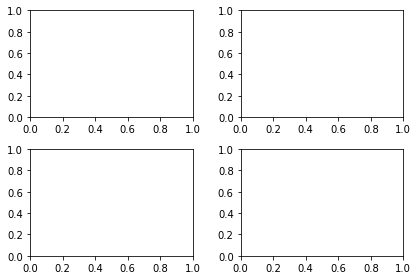

In [3]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2)
fig1.tight_layout()

For a simple use case such as this, :mod:`~matplotlib.gridspec` is
perhaps overly verbose.
You have to create the figure and :class:`~matplotlib.gridspec.GridSpec`
instance separately, then pass elements of gridspec instance to the
:func:`~matplotlib.figure.Figure.add_subplot` method to create the axes
objects.
The elements of the gridspec are accessed in generally the same manner as
numpy arrays.



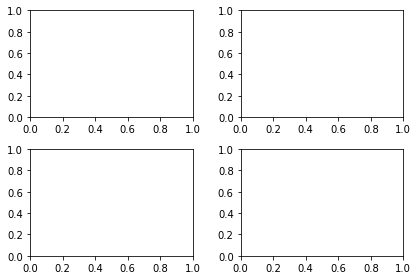

In [4]:
fig2 = plt.figure()
spec2 = gridspec.GridSpec(ncols=2, nrows=2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])
fig2.tight_layout()

When you want to have subplots of different sizes, however,
:mod:`~matplotlib.gridspec` becomes indispensable and provides a couple
of options.
The method shown here initializes a uniform grid specification,
and then uses typical numpy indexing and slices to allocate multiple
"cells" for a given subplot.



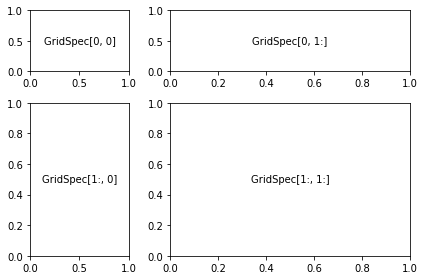

In [5]:
fig3 = plt.figure()
spec3 = gridspec.GridSpec(ncols=3, nrows=3)
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center')

fig3.add_subplot(spec3[0, 0]).annotate('GridSpec[0, 0]', **anno_opts)
fig3.add_subplot(spec3[0, 1:]).annotate('GridSpec[0, 1:]', **anno_opts)
fig3.add_subplot(spec3[1:, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
fig3.add_subplot(spec3[1:, 1:]).annotate('GridSpec[1:, 1:]', **anno_opts)

fig3.tight_layout()

Other option is to use the ``width_ratios`` and ``height_ratios``
parameters. These keyword arguments are lists of numbers.
Note that absolute values are meaningless, only their relative ratios
matter. That means that ``width_ratios=[2, 4, 8]`` is equivalent to
``width_ratios=[1, 2, 4]`` within equally wide figures.
For the sake of demonstration, we'll blindly create the axes within
``for`` loops since we won't need them later.



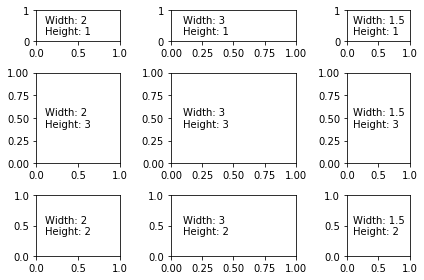

In [6]:
fig4 = plt.figure()
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec4 = gridspec.GridSpec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig4.add_subplot(spec4[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

fig4.tight_layout()

Learning to use ``width_ratios`` and ``height_ratios`` is particularly
useful since the top-level function :func:`~matplotlib.pyplot.subplots`
accepts them within the ``gridspec_kw`` parameter.
For that matter, any parameter accepted by
:class:`~matplotlib.gridspec.GridSpec` can be passed to
:func:`~matplotlib.pyplot.subplots` via the ``gridspec_kw`` parameter.
This example recreates the previous figure without directly using a
gridspec instance.



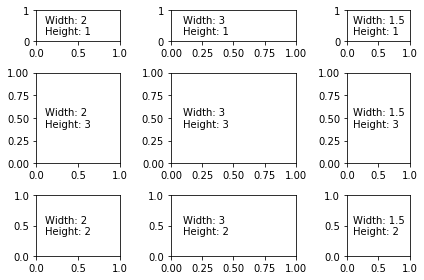

In [7]:
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig5, f5_axes = plt.subplots(ncols=3, nrows=3, gridspec_kw=gs_kw)
for r, row in enumerate(f5_axes):
    for c, ax in enumerate(row):
        label = 'Width: {}\nHeight: {}'.format(widths[c], heights[r])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

fig5.tight_layout()

Fine Adjustments to a Gridspec Layout
=====================================

When a GridSpec is explicitly used, you can adjust the layout
parameters of subplots that are created from the GridSpec.



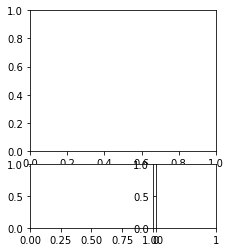

In [8]:
fig = plt.figure()
gs1 = gridspec.GridSpec(nrows=3, ncols=3, left=0.05, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs1[:-1, :])
ax2 = fig.add_subplot(gs1[-1, :-1])
ax3 = fig.add_subplot(gs1[-1, -1])

This is similar to :func:`~matplotlib.pyplot.subplots_adjust`, but it only
affects the subplots that are created from the given GridSpec.

For example, compare the left and right sides of this figure:



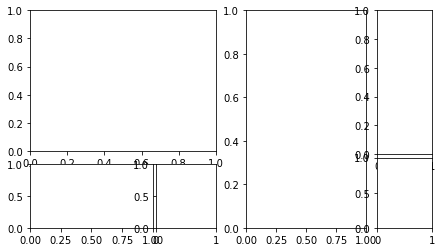

In [9]:
fig = plt.figure()
gs1 = gridspec.GridSpec(nrows=3, ncols=3, left=0.05, right=0.48,
                        wspace=0.05)
ax1 = fig.add_subplot(gs1[:-1, :])
ax2 = fig.add_subplot(gs1[-1, :-1])
ax3 = fig.add_subplot(gs1[-1, -1])


gs2 = gridspec.GridSpec(nrows=3, ncols=3, left=0.55, right=0.98,
                        hspace=0.05)
ax4 = fig.add_subplot(gs2[:, :-1])
ax5 = fig.add_subplot(gs2[:-1, -1])
ax6 = fig.add_subplot(gs2[-1, -1])

GridSpec using SubplotSpec
==========================

You can create GridSpec from the :class:`~matplotlib.gridspec.SubplotSpec`,
in which case its layout parameters are set to that of the location of
the given SubplotSpec.



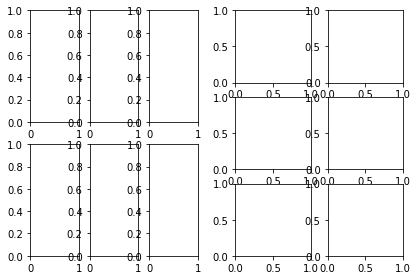

In [10]:
fig = plt.figure()
gs0 = gridspec.GridSpec(1, 2)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=gs0[1])

for a in range(2):
    for b in range(3):
        fig.add_subplot(gs00[a, b])
        fig.add_subplot(gs01[b, a])

fig.tight_layout()

A Complex Nested GridSpec using SubplotSpec
===========================================

Here's a more sophisticated example of nested GridSpec where we put
a box around each cell of the outer 4x4 grid, by hiding appropriate
spines in each of the inner 3x3 grids.



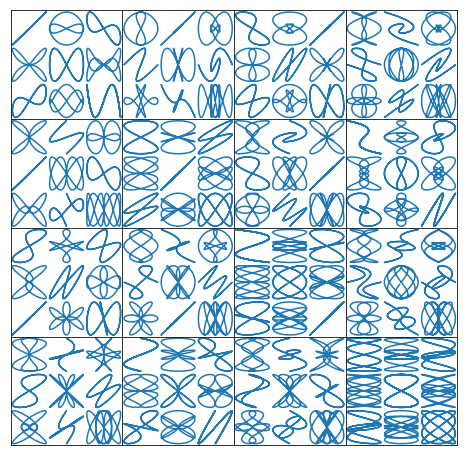

In [11]:
import numpy as np
from itertools import product


def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)

for i in range(16):
    inner_grid = gridspec.GridSpecFromSubplotSpec(
      3, 3, subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0)
    a, b = int(i/4)+1, i % 4+1
    for j, (c, d) in enumerate(product(range(1, 4), repeat=2)):
        ax = plt.Subplot(fig, inner_grid[j])
        ax.plot(*squiggle_xy(a, b, c, d))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

all_axes = fig.get_axes()

# show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()